#### Imports Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [19]:
dataset = pd.read_csv("english-news-dataset.csv")
dataset.head()
dataset.category.unique()

array(['Sports', 'Politics'], dtype=object)

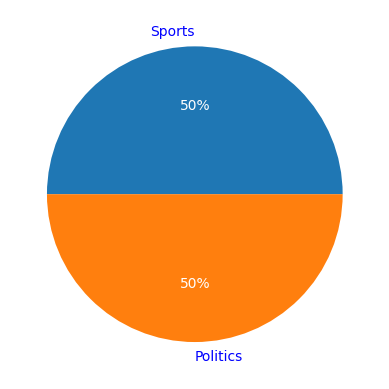

In [20]:
labels = dataset["category"].unique()
sizes = [len(dataset[dataset.category == label]) for label in labels]

wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels,
    autopct="%.0f%%",
    textprops={'color': 'blue'}
)

for autotext in autotexts:
    autotext.set_color('white')

In [21]:
dataset["category"] = dataset.category.map({"Sports": 0, "Politics": 1})
dataset.tail()

,headline,description,category,source,url
95,Student politics banned in 33 institutions of ...,"In face of student demands, student politics h...",1,prothomalo,https://en.prothomalo.com/bangladesh/politics/...
96,Interim govt cannot be allowed to fail: Tariqu...,He also urged the interim government to remain...,1,prothomalo,https://en.prothomalo.com/bangladesh/politics/...
97,Asif Mahmud bins 'rumour' of potential politic...,He also clarified that no members of the curre...,1,prothomalo,https://en.prothomalo.com/bangladesh/politics/...
98,BNP rally begins at Naya Paltan,"Tarique Rahman, the party's acting chairperson...",1,prothomalo,https://en.prothomalo.com/bangladesh/politics/...
99,We have long way to go to build strong democra...,He came up with the statement marking the occa...,1,prothomalo,https://en.prothomalo.com/bangladesh/politics/...


In [22]:
X = dataset["headline"]
y = dataset["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Orginal Dataset Contains: ", dataset.shape[0], "Message")
print("Training  set contains: ", X_train.shape[0], "Message")
print("Testing set Contains: ", X_test.shape[0], "Message")

Orginal Dataset Contains:  100 Message
Training  set contains:  80 Message
Testing set Contains:  20 Message


In [23]:
count_vector = CountVectorizer()
train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)

In [24]:
model = MultinomialNB()
model.fit(train, y_train)

MultinomialNB()

In [25]:
custom_review = ["Dr Yunus to hold dialogue with some parties today"]

mess = count_vector .transform(custom_review)

predict = model.predict(mess)

print(predict)


[1]


In [26]:
prediction = model.predict(test)
score = np.mean(prediction == y_test)
print("Score:", score)
print(
    f"Model Accuracy: {round(score*100)}%",
)

Score: 0.9
Model Accuracy: 90%


In [27]:
conf_mat = confusion_matrix(y_test, prediction)
print(conf_mat)

[[ 7  1]
 [ 1 11]]
